In [2]:
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as math

In [3]:
questURL = 'http://ClinicalTrials.gov/api/query/study_fields?expr=covid+19\
           &min_rnk=1\
           &max_rnk=1\
           &fields=\
               NCTId,\
               BriefTitle,\
               StatusVerifiedDate,\
               CompletionDate,\
               OrgFullName,\
               OrgClass,\
               keyword,\
               LocationCity,\
               LocationCountry,\
               EnrollmentCount,\
               STDAge,\
               Gender\
           &fmt=JSON'
Quest = requests.get(questURL).json()
Quest

{'StudyFieldsResponse': {'APIVrs': '1.01.02',
  'DataVrs': '2020:07:29 00:02:07.367',
  'Expression': 'covid 19',
  'NStudiesAvail': 347165,
  'NStudiesFound': 2925,
  'MinRank': 1,
  'MaxRank': 1,
  'NStudiesReturned': 1,
  'FieldList': ['NCTId',
   'BriefTitle',
   'StatusVerifiedDate',
   'CompletionDate',
   'OrgFullName',
   'OrgClass',
   'Keyword',
   'LocationCity',
   'LocationCountry',
   'EnrollmentCount',
   'StdAge',
   'Gender'],
  'StudyFields': [{'Rank': 1,
    'NCTId': ['NCT04395482'],
    'BriefTitle': ['Lung CT Scan Analysis of SARS-CoV2 Induced Lung Injury'],
    'StatusVerifiedDate': ['May 2020'],
    'CompletionDate': ['October 15, 2020'],
    'OrgFullName': ['University of Milano Bicocca'],
    'OrgClass': ['OTHER'],
    'Keyword': ['Lung injury', 'sars-covid-2', 'coronavirus infection'],
    'LocationCity': ['Bergamo',
     'Bergamo',
     'Ferrara',
     'Lecco',
     'Melzo',
     'Monza',
     'Rimini',
     'San Marino'],
    'LocationCountry': ['Italy',
   

In [4]:
limit1 = Quest['StudyFieldsResponse']['NStudiesFound'] #make sure we don't ask for results outside of the scope of our query
limit1

2925

In [5]:
tempURL1 = 'http://ClinicalTrials.gov/api/query/study_fields?expr=covid+19\
           &min_rnk=1\
           &max_rnk=1000\
           &fields=\
               NCTId,\
               BriefTitle,\
               StatusVerifiedDate,\
               StartDate,\
               CompletionDate,\
               OrgFullName,\
               OrgClass,\
               keyword,\
               LocationFacility,\
               LocationStatus,\
               LocationCity,\
               LocationCountry,\
               EnrollmentCount,\
               STDAge,\
               Gender\
           &fmt=JSON'   
tempL1 = requests.get(tempURL1).json()

tempURL2 = 'http://ClinicalTrials.gov/api/query/study_fields?expr=covid+19\
           &min_rnk=1001\
           &max_rnk=2000\
           &fields=\
               NCTId,\
               BriefTitle,\
               StatusVerifiedDate,\
               StartDate,\
               CompletionDate,\
               OrgFullName,\
               OrgClass,\
               keyword,\
               LocationFacility,\
               LocationStatus,\
               LocationCity,\
               LocationCountry,\
               EnrollmentCount,\
               STDAge,\
               Gender\
           &fmt=JSON'
tempL2 = requests.get(tempURL2).json()                                                             

tempURL3 = f'http://ClinicalTrials.gov/api/query/study_fields?expr=covid+19\
           &min_rnk=2001\
           &max_rnk={limit1}\
           &fields=\
               NCTId,\
               BriefTitle,\
               StatusVerifiedDate,\
               StartDate,\
               CompletionDate,\
               OrgFullName,\
               OrgClass,\
               keyword,\
               LocationFacility,\
               LocationStatus,\
               LocationCity,\
               LocationCountry,\
               EnrollmentCount,\
               STDAge,\
               Gender\
           &fmt=JSON'
tempL3 = requests.get(tempURL3).json()

Q1_tempL1 = tempL1['StudyFieldsResponse']['StudyFields']
Q1_tempL2 = tempL2['StudyFieldsResponse']['StudyFields']
Q1_tempL3 = tempL3['StudyFieldsResponse']['StudyFields']


In [6]:
Q1_tempDF1 = pd.DataFrame(Q1_tempL1)
Q1_tempDF2 = pd.DataFrame(Q1_tempL2)
Q1_tempDF3 = pd.DataFrame(Q1_tempL3)

In [7]:
def change_remove1(df):
    df = df.astype(str)
    df["NCTId"] = df["NCTId"].str.lstrip("['")
    df["NCTId"] = df["NCTId"].str.rstrip("']")
    df["BriefTitle"] = df["BriefTitle"].str.lstrip("['")
    df["BriefTitle"] = df["BriefTitle"].str.rstrip("']")
    df["StatusVerifiedDate"] = df["StatusVerifiedDate"].str.lstrip("['")
    df["StatusVerifiedDate"] = df["StatusVerifiedDate"].str.rstrip("']")
    df["CompletionDate"] = df["CompletionDate"].str.lstrip("['")
    df["CompletionDate"] = df["CompletionDate"].str.rstrip("']")
    df["OrgFullName"] = df["OrgFullName"].str.lstrip("['")
    df["OrgFullName"] = df["OrgFullName"].str.rstrip("']")
    df["OrgClass"] = df["OrgClass"].str.lstrip("['")
    df["OrgClass"] = df["OrgClass"].str.rstrip("']")
    df["Keyword"] = df["Keyword"].str.lstrip("['")
    df["Keyword"] = df["Keyword"].str.rstrip("']")
    df["LocationCity"] = df["LocationCity"].str.lstrip("['")
    df["LocationCity"] = df["LocationCity"].str.rstrip("']")
    df["LocationCountry"] = df["LocationCountry"].str.lstrip("['")
    df["LocationCountry"] = df["LocationCountry"].str.rstrip("']")
    df["EnrollmentCount"] = df["EnrollmentCount"].str.lstrip("['")
    df["EnrollmentCount"] = df["EnrollmentCount"].str.rstrip("']")
    df["StdAge"] = df["StdAge"].str.lstrip("['")
    df["StdAge"] = df["StdAge"].str.rstrip("']")
    df["Gender"] = df["Gender"].str.lstrip("['")
    df["Gender"] = df["Gender"].str.rstrip("']")
    return df

In [8]:
clean2 = change_remove1(Q1_tempDF2)

In [9]:
def change_remove45(df):
    df = df.astype(str)
    df["NCTId"] = df["NCTId"].str.lstrip("['")
    df["NCTId"] = df["NCTId"].str.rstrip("']")
    df["BriefTitle"] = df["BriefTitle"].str.lstrip("['")
    df["BriefTitle"] = df["BriefTitle"].str.rstrip("']")
    df["StatusVerifiedDate"] = df["StatusVerifiedDate"].str.lstrip("['")
    df["StatusVerifiedDate"] = df["StatusVerifiedDate"].str.rstrip("']")
    df["CompletionDate"] = df["CompletionDate"].str.lstrip("['")
    df["CompletionDate"] = df["CompletionDate"].str.rstrip("']")
    df["OrgFullName"] = df["OrgFullName"].str.lstrip("['")
    df["OrgFullName"] = df["OrgFullName"].str.rstrip("']")
    df["OrgClass"] = df["OrgClass"].str.lstrip("['")
    df["OrgClass"] = df["OrgClass"].str.rstrip("']")
    df["Keyword"] = df["Keyword"].str.lstrip("['")
    df["Keyword"] = df["Keyword"].str.rstrip("']")
    df["LocationCity"] = df["LocationCity"].str.lstrip("['")
    df["LocationCity"] = df["LocationCity"].str.rstrip("']")
    df["LocationCountry"] = df["LocationCountry"].str.lstrip("['")
    df["LocationCountry"] = df["LocationCountry"].str.rstrip("']")
    df["EnrollmentCount"] = df["EnrollmentCount"].str.lstrip("['")
    df["EnrollmentCount"] = df["EnrollmentCount"].str.rstrip("']")
    df["StdAge"] = df["StdAge"].str.lstrip("['")
    df["StdAge"] = df["StdAge"].str.rstrip("']")
    df["Gender"] = df["Gender"].str.lstrip("['")
    df["Gender"] = df["Gender"].str.rstrip("']")
    df["LocationFacility"] = df["LocationFacility"].str.lstrip("['")
    df["LocationFacility"] = df["LocationFacility"].str.rstrip("']")
    df["StartDate"] = df["StartDate"].str.lstrip("['")
    df["StartDate"] = df["StartDate"].str.rstrip("']")
    df["LocationStatus"] = df["LocationStatus"].str.lstrip("['")
    df["LocationStatus"] = df["LocationStatus"].str.rstrip("']")
    df["NCTId"] = df["NCTId"].str.replace("'","")
    df["BriefTitle"] = df["BriefTitle"].str.replace("'","")
    df["StatusVerifiedDate"] = df["StatusVerifiedDate"].str.replace("'","")
    df["CompletionDate"] = df["CompletionDate"].str.replace("'","")
    df["OrgFullName"] = df["OrgFullName"].str.replace("'","")
    df["OrgClass"] = df["OrgClass"].str.replace("'","")
    df["Keyword"] = df["Keyword"].str.replace("'","")
    df["LocationCity"] = df["LocationCity"].str.replace("'","")
    df["LocationCountry"] = df["LocationCountry"].str.replace("'","")
    df["EnrollmentCount"] = df["EnrollmentCount"].str.replace("'","")
    df["StdAge"] = df["StdAge"].str.replace("'","")
    df["Gender"] = df["Gender"].str.replace("'","")
    df["StartDate"] = df["StartDate"].str.replace("'","")
    df["LocationFacility"] = df["LocationFacility"].str.replace("'","")
    df["LocationFacility"] = df["LocationStatus"].str.replace("'","")
    df["EnrollmentCount"] = pd.to_numeric(df["EnrollmentCount"])
    return df

In [10]:
clean_Q1_tempDF3 = change_remove45(Q1_tempDF3)
clean_Q1_tempDF3

,Rank,NCTId,BriefTitle,StatusVerifiedDate,StartDate,CompletionDate,OrgFullName,OrgClass,Keyword,LocationFacility,LocationStatus,LocationCity,LocationCountry,EnrollmentCount,StdAge,Gender
0,2001,NCT04356586,Immune Response to Covid-19 in 300 Health Care...,April 2020,"April 30, 2020","July 30, 2020",Sciensano,OTHER_GOV,,,,Brussels,Belgium,300.0,"Adult, Older Adult",All
1,2002,NCT04388709,Interferon Lambda Therapy for COVID-19,June 2020,September 2020,May 2021,Icahn School of Medicine at Mount Sinai,OTHER,"Peginterferon lambda-1a, Lambda, SARS-CoV-2",,,New York,United States,66.0,"Adult, Older Adult",All
2,2003,NCT04320511,Beaumont Quantitative Lung Function Imaging to...,July 2020,"June 24, 2020",June 2022,William Beaumont Hospitals,OTHER,"Quantitative CT Lung Function Imaging, Pulmona...",Recruiting,Recruiting,Royal Oak,United States,25.0,"Adult, Older Adult",All
3,2004,NCT04321174,COVID-19 Ring-based Prevention Trial With Lopi...,April 2020,"April 17, 2020","March 31, 2022","""St. Michaels Hospital, Toronto""",OTHER,,"Not yet recruiting, Not yet recruiting, Recrui...","Not yet recruiting', 'Not yet recruiting', 'Re...","Vancouver, Toronto, Toronto, Toronto","Canada, Canada, Canada, Canada",1220.0,"Child, Adult, Older Adult",All
4,2005,NCT04387409,"""Study to Assess VPM1002 in Reducing Healthcar...",June 2020,"May 25, 2020","June 30, 2021",Vakzine Projekt Management GmbH,INDUSTRY,"infectious respiratory diseases, COVID-19","Recruiting, Recruiting","Recruiting', 'Recruiting","Hannover, Erfurt","Germany, Germany",1200.0,"Adult, Older Adult",All
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
920,2921,NCT03728257,Lung Transplant G0 (LTGO): Improving Self-Mana...,June 2020,"March 25, 2019","April 8, 2022",University of Pittsburgh,OTHER,,Recruiting,Recruiting,Pittsburgh,United States,112.0,"Adult, Older Adult",All
921,2922,NCT03823469,Evaluating the Impact of a Culinary Coaching T...,May 2020,"May 20, 2019",February 2022,Spaulding Rehabilitation Hospital,OTHER,"Home cooking, Telemedicine, Nutrition, Health ...","Completed, Recruiting","Completed', 'Recruiting","Charlestown, Ramat Gan","United States, Israel",78.0,"Adult, Older Adult",All
922,2923,NCT04429061,Reaching 90 90 90 in Adolescents in Zambia: Us...,June 2020,"March 1, 2020","June 30, 2023",University of Alabama at Birmingham,OTHER,"Adolescents, Zambia, Football",Recruiting,Recruiting,Lusaka,Zambia,3200.0,"Child, Adult, Older Adult",Female
923,2924,NCT03922334,Navigating New Motherhood 2,June 2020,"January 21, 2020",December 2024,Northwestern University,OTHER,,Recruiting,Recruiting,Chicago,United States,400.0,"Child, Adult",Female


In [11]:
clean_Q1_tempDF2 = change_remove45(Q1_tempDF2)
clean_Q1_tempDF1 = change_remove45(Q1_tempDF1)

In [12]:
query = 'coronavirus'
quest2URL = f'http://ClinicalTrials.gov/api/query/study_fields?expr={query}\
           &min_rnk=1\
           &max_rnk=1\
           &fields=\
               NCTId,\
               BriefTitle,\
               StatusVerifiedDate,\
               StartDate,\
               CompletionDate,\
               OrgFullName,\
               OrgClass,\
               keyword,\
               LocationFacility,\
               LocationStatus,\
               LocationCity,\
               LocationCountry,\
               EnrollmentCount,\
               STDAge,\
               Gender\
           &fmt=JSON'
Quest2 = requests.get(quest2URL).json()
Quest2

{'StudyFieldsResponse': {'APIVrs': '1.01.02',
  'DataVrs': '2020:07:29 00:02:07.367',
  'Expression': 'coronavirus',
  'NStudiesAvail': 347165,
  'NStudiesFound': 1481,
  'MinRank': 1,
  'MaxRank': 1,
  'NStudiesReturned': 1,
  'FieldList': ['NCTId',
   'BriefTitle',
   'StatusVerifiedDate',
   'StartDate',
   'CompletionDate',
   'OrgFullName',
   'OrgClass',
   'Keyword',
   'LocationFacility',
   'LocationStatus',
   'LocationCity',
   'LocationCountry',
   'EnrollmentCount',
   'StdAge',
   'Gender'],
  'StudyFields': [{'Rank': 1,
    'NCTId': ['NCT04279795'],
    'BriefTitle': ['Detection of 2019 Novel Coronavirus in Multiple Organ System and Its Relationship With Clinical Manifestations'],
    'StatusVerifiedDate': ['February 2020'],
    'StartDate': ['January 20, 2020'],
    'CompletionDate': ['February 28, 2021'],
    'OrgFullName': ['Third Affiliated Hospital, Sun Yat-Sen University'],
    'OrgClass': ['OTHER'],
    'Keyword': ['2019 Novel Coronavirus'],
    'LocationFacility'

In [13]:
limit2 = Quest2['StudyFieldsResponse']['NStudiesFound'] #make sure we don't ask for results outside of the scope of our query
limit2

1481

In [14]:
tempURL1 = 'http://ClinicalTrials.gov/api/query/study_fields?expr=covid+19\
           &min_rnk=1\
           &max_rnk=1000\
           &fields=\
               NCTId,\
               BriefTitle,\
               StatusVerifiedDate,\
               StartDate,\
               CompletionDate,\
               OrgFullName,\
               OrgClass,\
               keyword,\
               LocationFacility,\
               LocationStatus,\
               LocationCity,\
               LocationCountry,\
               EnrollmentCount,\
               STDAge,\
               Gender\
           &fmt=JSON'   

tempL1 = requests.get(tempURL1).json()

tempURL2 = f'http://ClinicalTrials.gov/api/query/study_fields?expr=covid+19\
           &min_rnk=1001\
           &max_rnk={limit2}\
           &fields=\
               NCTId,\
               BriefTitle,\
               StatusVerifiedDate,\
               StartDate,\
               CompletionDate,\
               OrgFullName,\
               OrgClass,\
               keyword,\
               LocationFacility,\
               LocationStatus,\
               LocationCity,\
               LocationCountry,\
               EnrollmentCount,\
               STDAge,\
               Gender\
           &fmt=JSON'
tempL2 = requests.get(tempURL2).json()                                                             

Q2_tempL1 = tempL1['StudyFieldsResponse']['StudyFields']
Q2_tempL2 = tempL2['StudyFieldsResponse']['StudyFields']


In [15]:
Q2_tempDF1 = pd.DataFrame(Q2_tempL1)
Q2_tempDF2 = pd.DataFrame(Q2_tempL2)

In [16]:
clean_Q2_tempDF1 = change_remove45(Q2_tempDF1)
clean_Q2_tempDF1

,Rank,NCTId,BriefTitle,StatusVerifiedDate,StartDate,CompletionDate,OrgFullName,OrgClass,Keyword,LocationFacility,LocationStatus,LocationCity,LocationCountry,EnrollmentCount,StdAge,Gender
0,1,NCT04395482,Lung CT Scan Analysis of SARS-CoV2 Induced Lun...,May 2020,"April 15, 2020","October 15, 2020",University of Milano Bicocca,OTHER,"Lung injury, sars-covid-2, coronavirus infection","Recruiting, Recruiting, Recruiting, Recruiting...","Recruiting', 'Recruiting', 'Recruiting', 'Recr...","Bergamo, Bergamo, Ferrara, Lecco, Melzo, Monza...","Italy, Italy, Italy, Italy, Italy, Italy, Ital...",500.0,"Adult, Older Adult",All
1,2,NCT04395924,Maternal-foetal Transmission of SARS-Cov-2,June 2020,"May 5, 2020",May 2021,"""Centre Hospitalier Régional dOrléans""",OTHER,"Pregnancy, RT-PCR-COVID-19, SARS-CoV 2 serolog...",Recruiting,Recruiting,Orléans,France,50.0,Adult,Female
2,3,NCT04476940,COVID-19 Breastfeeding Guideline for African-A...,July 2020,September 2020,June 2022,Meharry Medical College,OTHER,"COVID-19, Exclusive Breastfeeding, Breastfeedi...",,,Nashville,United States,200.0,Adult,Female
3,4,NCT04412265,Frailty in Elderly Patients With COVID-19,June 2020,"March 1, 2020","March 1, 2021",University of Milano Bicocca,OTHER,"Coronavirus, sars-covid-2, coronavirus infecti...",Recruiting,Recruiting,Monza,Italy,300.0,"Adult, Older Adult",All
4,5,NCT04427332,Smell and Taste Disorders in COVID-19 Patients,June 2020,"May 15, 2020","September 30, 2020",University of Milano Bicocca,OTHER,"Coronavirus, sars-covid-2, coronavirus infection",Recruiting,Recruiting,Monza,Italy,500.0,"Adult, Older Adult",All
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,NCT04344548,Phase I / II Clinical Study of Immunotherapy B...,April 2020,"April 13, 2020","November 10, 2020",Universidad Nacional de Colombia,OTHER,,,,"Bogotá, Bogota","Colombia, Colombia",10.0,"Adult, Older Adult",All
996,997,NCT04408040,Use of Convalescent Plasma for COVID-19,July 2020,"July 14, 2020","July 31, 2022","Northside Hospital, Inc.",OTHER,,Recruiting,Recruiting,Atlanta,United States,700.0,"Adult, Older Adult",All
997,998,NCT04408365,"Endothelial Function, Inflammation and Organ D...",May 2020,"June 1, 2020","May 31, 2021","""Guys and St Thomas NHS Foundation Trust""",OTHER,,,,,,82.0,"Adult, Older Adult",All
998,999,NCT04416308,COVID 19 : Seroprevalence Study of Anti SRAS-C...,June 2020,"May 29, 2020","October 10, 2020",Rennes University Hospital,OTHER,"Covid 19, SRAS-CoV-2","Recruiting, Recruiting, Recruiting, Recruiting...","Recruiting', 'Recruiting', 'Recruiting', 'Recr...","La Guerche de Bretagne, Fougères, Grand-Fouger...","France, France, France, France, France, France...",13000.0,"Adult, Older Adult",All


In [17]:
clean_Q2_tempDF2 = change_remove45(Q2_tempDF2)
clean_Q2_tempDF2

,Rank,NCTId,BriefTitle,StatusVerifiedDate,StartDate,CompletionDate,OrgFullName,OrgClass,Keyword,LocationFacility,LocationStatus,LocationCity,LocationCountry,EnrollmentCount,StdAge,Gender
0,1001,NCT04354701,COVID-19 and Cancer Consortium Registry,April 2020,"March 17, 2020",December 2022,Vanderbilt-Ingram Cancer Center,OTHER,,Recruiting,Recruiting,Nashville,United States,1000.0,"Adult, Older Adult",All
1,1002,NCT04350931,Application of BCG Vaccine for Immune-prophyla...,April 2020,"April 20, 2020","December 1, 2020",Ain Shams University,OTHER,,,,Cairo,Egypt,900.0,"Adult, Older Adult",All
2,1003,NCT04362124,Performance Evaluation of BCG Vaccination in H...,April 2020,April 2020,November 2021,Universidad de Antioquia,OTHER,"coronavirus, BCG, COVID-19, SARS-COV-2",,,Medellín,Colombia,1000.0,"Adult, Older Adult",All
3,1004,NCT04377503,Tocilizumab Versus Methylprednisolone in the C...,May 2020,May 2020,November 2020,Hospital Sao Domingos,OTHER,"Cytokine release syndrome, COVID-19, Tocilizum...",,,,,40.0,"Adult, Older Adult",All
4,1005,NCT04444609,PROSAIC-19 - Prospective Longitudinal Assessme...,June 2020,June 2020,June 2022,Imperial College London,OTHER,,,,,,230.0,"Child, Adult, Older Adult",All
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,1477,NCT04414059,Protein Electrophoresis as a Tool for Complica...,June 2020,"June 15, 2020",June 2021,Elsan,OTHER,COVID-19,,,Stains,France,155.0,"Adult, Older Adult",All
477,1478,NCT04390477,Study to Evaluate the Effect of a Probiotic in...,May 2020,"May 4, 2020",May 2021,Bioithas SL,INDUSTRY,Probiotic,"Recruiting, Recruiting","Recruiting', 'Recruiting","Elche, Torrevieja","Spain, Spain",40.0,"Adult, Older Adult",All
478,1479,NCT04355351,Study of Immune Response During SARS-CoV-2 Inf...,April 2020,"May 5, 2020","October 22, 2020",Centre Hospitalier Universitaire de Nice,OTHER,,"Recruiting, Recruiting, Recruiting","Recruiting', 'Recruiting', 'Recruiting","Antibes, Cannes, Nice","France, France, France",400.0,"Adult, Older Adult",All
479,1480,NCT04389840,Dociparstat for the Treatment of Severe COVID-...,May 2020,"June 3, 2020",March 2021,Chimerix,INDUSTRY,"COVID-19, ALI, SARS-CoV-2","Recruiting, Recruiting, Recruiting, Recruiting...","Recruiting', 'Recruiting', 'Recruiting', 'Recr...","Baton Rouge, New Orleans, New Orleans, Royal O...","United States, United States, United States, U...",524.0,"Adult, Older Adult",All


In [18]:
DF_QQ = pd.concat([clean_Q1_tempDF1, clean_Q1_tempDF2, clean_Q1_tempDF3, clean_Q2_tempDF1, clean_Q2_tempDF2], ignore_index=True)
DF_QQ = DF_QQ.drop_duplicates()
DF_QQ

,Rank,NCTId,BriefTitle,StatusVerifiedDate,StartDate,CompletionDate,OrgFullName,OrgClass,Keyword,LocationFacility,LocationStatus,LocationCity,LocationCountry,EnrollmentCount,StdAge,Gender
0,1,NCT04395482,Lung CT Scan Analysis of SARS-CoV2 Induced Lun...,May 2020,"April 15, 2020","October 15, 2020",University of Milano Bicocca,OTHER,"Lung injury, sars-covid-2, coronavirus infection","Recruiting, Recruiting, Recruiting, Recruiting...","Recruiting', 'Recruiting', 'Recruiting', 'Recr...","Bergamo, Bergamo, Ferrara, Lecco, Melzo, Monza...","Italy, Italy, Italy, Italy, Italy, Italy, Ital...",500.0,"Adult, Older Adult",All
1,2,NCT04395924,Maternal-foetal Transmission of SARS-Cov-2,June 2020,"May 5, 2020",May 2021,"""Centre Hospitalier Régional dOrléans""",OTHER,"Pregnancy, RT-PCR-COVID-19, SARS-CoV 2 serolog...",Recruiting,Recruiting,Orléans,France,50.0,Adult,Female
2,3,NCT04476940,COVID-19 Breastfeeding Guideline for African-A...,July 2020,September 2020,June 2022,Meharry Medical College,OTHER,"COVID-19, Exclusive Breastfeeding, Breastfeedi...",,,Nashville,United States,200.0,Adult,Female
3,4,NCT04412265,Frailty in Elderly Patients With COVID-19,June 2020,"March 1, 2020","March 1, 2021",University of Milano Bicocca,OTHER,"Coronavirus, sars-covid-2, coronavirus infecti...",Recruiting,Recruiting,Monza,Italy,300.0,"Adult, Older Adult",All
4,5,NCT04427332,Smell and Taste Disorders in COVID-19 Patients,June 2020,"May 15, 2020","September 30, 2020",University of Milano Bicocca,OTHER,"Coronavirus, sars-covid-2, coronavirus infection",Recruiting,Recruiting,Monza,Italy,500.0,"Adult, Older Adult",All
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4401,1477,NCT04414059,Protein Electrophoresis as a Tool for Complica...,June 2020,"June 15, 2020",June 2021,Elsan,OTHER,COVID-19,,,Stains,France,155.0,"Adult, Older Adult",All
4402,1478,NCT04390477,Study to Evaluate the Effect of a Probiotic in...,May 2020,"May 4, 2020",May 2021,Bioithas SL,INDUSTRY,Probiotic,"Recruiting, Recruiting","Recruiting', 'Recruiting","Elche, Torrevieja","Spain, Spain",40.0,"Adult, Older Adult",All
4403,1479,NCT04355351,Study of Immune Response During SARS-CoV-2 Inf...,April 2020,"May 5, 2020","October 22, 2020",Centre Hospitalier Universitaire de Nice,OTHER,,"Recruiting, Recruiting, Recruiting","Recruiting', 'Recruiting', 'Recruiting","Antibes, Cannes, Nice","France, France, France",400.0,"Adult, Older Adult",All
4404,1480,NCT04389840,Dociparstat for the Treatment of Severe COVID-...,May 2020,"June 3, 2020",March 2021,Chimerix,INDUSTRY,"COVID-19, ALI, SARS-CoV-2","Recruiting, Recruiting, Recruiting, Recruiting...","Recruiting', 'Recruiting', 'Recruiting', 'Recr...","Baton Rouge, New Orleans, New Orleans, Royal O...","United States, United States, United States, U...",524.0,"Adult, Older Adult",All


In [19]:
dups_color = DF_QQ.pivot_table(index=['NCTId'], aggfunc='size')
print (dups_color)

NCTId
NCT01306084    1
NCT02517489    1
NCT02656381    1
NCT02735707    1
NCT02765191    1
              ..
NCT04491214    1
NCT04491227    1
NCT04491240    2
NCT04491292    1
NCT04491318    1
Length: 2921, dtype: int64


In [20]:
df_final = DF_QQ.drop_duplicates(subset='NCTId', keep="first")
df_final

,Rank,NCTId,BriefTitle,StatusVerifiedDate,StartDate,CompletionDate,OrgFullName,OrgClass,Keyword,LocationFacility,LocationStatus,LocationCity,LocationCountry,EnrollmentCount,StdAge,Gender
0,1,NCT04395482,Lung CT Scan Analysis of SARS-CoV2 Induced Lun...,May 2020,"April 15, 2020","October 15, 2020",University of Milano Bicocca,OTHER,"Lung injury, sars-covid-2, coronavirus infection","Recruiting, Recruiting, Recruiting, Recruiting...","Recruiting', 'Recruiting', 'Recruiting', 'Recr...","Bergamo, Bergamo, Ferrara, Lecco, Melzo, Monza...","Italy, Italy, Italy, Italy, Italy, Italy, Ital...",500.0,"Adult, Older Adult",All
1,2,NCT04395924,Maternal-foetal Transmission of SARS-Cov-2,June 2020,"May 5, 2020",May 2021,"""Centre Hospitalier Régional dOrléans""",OTHER,"Pregnancy, RT-PCR-COVID-19, SARS-CoV 2 serolog...",Recruiting,Recruiting,Orléans,France,50.0,Adult,Female
2,3,NCT04476940,COVID-19 Breastfeeding Guideline for African-A...,July 2020,September 2020,June 2022,Meharry Medical College,OTHER,"COVID-19, Exclusive Breastfeeding, Breastfeedi...",,,Nashville,United States,200.0,Adult,Female
3,4,NCT04412265,Frailty in Elderly Patients With COVID-19,June 2020,"March 1, 2020","March 1, 2021",University of Milano Bicocca,OTHER,"Coronavirus, sars-covid-2, coronavirus infecti...",Recruiting,Recruiting,Monza,Italy,300.0,"Adult, Older Adult",All
4,5,NCT04427332,Smell and Taste Disorders in COVID-19 Patients,June 2020,"May 15, 2020","September 30, 2020",University of Milano Bicocca,OTHER,"Coronavirus, sars-covid-2, coronavirus infection",Recruiting,Recruiting,Monza,Italy,500.0,"Adult, Older Adult",All
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3914,990,NCT04403438,Familial Mediterranean Fever and Behçet: Analy...,May 2020,"April 1, 2020","June 15, 2020",Istanbul University,OTHER,,,,Istanbul,Turkey,45.0,"Adult, Older Adult",All
3916,992,NCT04416334,PREEMPTIVE THERAPY WITH COLCHICINE IN PATIENTS...,June 2020,"May 25, 2020","December 31, 2020",Instituto de Investigación Marqués de Valdecilla,OTHER,colchicine,"Recruiting, Recruiting, Recruiting, Recruiting","Recruiting', 'Recruiting', 'Recruiting', 'Recr...","Laredo, Reinosa, Santander, Torrelavega","Spain, Spain, Spain, Spain",1028.0,Older Adult,All
3923,999,NCT04416308,COVID 19 : Seroprevalence Study of Anti SRAS-C...,June 2020,"May 29, 2020","October 10, 2020",Rennes University Hospital,OTHER,"Covid 19, SRAS-CoV-2","Recruiting, Recruiting, Recruiting, Recruiting...","Recruiting', 'Recruiting', 'Recruiting', 'Recr...","La Guerche de Bretagne, Fougères, Grand-Fouger...","France, France, France, France, France, France...",13000.0,"Adult, Older Adult",All
3927,1003,NCT04362124,Performance Evaluation of BCG Vaccination in H...,April 2020,April 2020,November 2021,Universidad de Antioquia,OTHER,"coronavirus, BCG, COVID-19, SARS-COV-2",,,Medellín,Colombia,1000.0,"Adult, Older Adult",All


In [21]:
df_final

,Rank,NCTId,BriefTitle,StatusVerifiedDate,StartDate,CompletionDate,OrgFullName,OrgClass,Keyword,LocationFacility,LocationStatus,LocationCity,LocationCountry,EnrollmentCount,StdAge,Gender
0,1,NCT04395482,Lung CT Scan Analysis of SARS-CoV2 Induced Lun...,May 2020,"April 15, 2020","October 15, 2020",University of Milano Bicocca,OTHER,"Lung injury, sars-covid-2, coronavirus infection","Recruiting, Recruiting, Recruiting, Recruiting...","Recruiting', 'Recruiting', 'Recruiting', 'Recr...","Bergamo, Bergamo, Ferrara, Lecco, Melzo, Monza...","Italy, Italy, Italy, Italy, Italy, Italy, Ital...",500.0,"Adult, Older Adult",All
1,2,NCT04395924,Maternal-foetal Transmission of SARS-Cov-2,June 2020,"May 5, 2020",May 2021,"""Centre Hospitalier Régional dOrléans""",OTHER,"Pregnancy, RT-PCR-COVID-19, SARS-CoV 2 serolog...",Recruiting,Recruiting,Orléans,France,50.0,Adult,Female
2,3,NCT04476940,COVID-19 Breastfeeding Guideline for African-A...,July 2020,September 2020,June 2022,Meharry Medical College,OTHER,"COVID-19, Exclusive Breastfeeding, Breastfeedi...",,,Nashville,United States,200.0,Adult,Female
3,4,NCT04412265,Frailty in Elderly Patients With COVID-19,June 2020,"March 1, 2020","March 1, 2021",University of Milano Bicocca,OTHER,"Coronavirus, sars-covid-2, coronavirus infecti...",Recruiting,Recruiting,Monza,Italy,300.0,"Adult, Older Adult",All
4,5,NCT04427332,Smell and Taste Disorders in COVID-19 Patients,June 2020,"May 15, 2020","September 30, 2020",University of Milano Bicocca,OTHER,"Coronavirus, sars-covid-2, coronavirus infection",Recruiting,Recruiting,Monza,Italy,500.0,"Adult, Older Adult",All
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3914,990,NCT04403438,Familial Mediterranean Fever and Behçet: Analy...,May 2020,"April 1, 2020","June 15, 2020",Istanbul University,OTHER,,,,Istanbul,Turkey,45.0,"Adult, Older Adult",All
3916,992,NCT04416334,PREEMPTIVE THERAPY WITH COLCHICINE IN PATIENTS...,June 2020,"May 25, 2020","December 31, 2020",Instituto de Investigación Marqués de Valdecilla,OTHER,colchicine,"Recruiting, Recruiting, Recruiting, Recruiting","Recruiting', 'Recruiting', 'Recruiting', 'Recr...","Laredo, Reinosa, Santander, Torrelavega","Spain, Spain, Spain, Spain",1028.0,Older Adult,All
3923,999,NCT04416308,COVID 19 : Seroprevalence Study of Anti SRAS-C...,June 2020,"May 29, 2020","October 10, 2020",Rennes University Hospital,OTHER,"Covid 19, SRAS-CoV-2","Recruiting, Recruiting, Recruiting, Recruiting...","Recruiting', 'Recruiting', 'Recruiting', 'Recr...","La Guerche de Bretagne, Fougères, Grand-Fouger...","France, France, France, France, France, France...",13000.0,"Adult, Older Adult",All
3927,1003,NCT04362124,Performance Evaluation of BCG Vaccination in H...,April 2020,April 2020,November 2021,Universidad de Antioquia,OTHER,"coronavirus, BCG, COVID-19, SARS-COV-2",,,Medellín,Colombia,1000.0,"Adult, Older Adult",All


In [22]:
#Beginning of Ray's analysis

In [23]:
#Create a dataframe which contains site location information

NCTId = df_final["NCTId"]
fullname = df_final["OrgFullName"]
facility = df_final["LocationFacility"]
status = df_final["LocationStatus"]
city = df_final["LocationCity"]
country = df_final["LocationCountry"]
orgclass = df_final["OrgClass"]

location_data = pd.DataFrame({
    'NCTId': NCTId,
    'OrgFullName': fullname,
    'LocationFacility': facility,
    'LocationStatus': status,
    'LocationCity': city,
    'LocationCountry': country,
    'OrgClass': orgclass})

In [24]:
# Code not used in final output
#Separate OrgFull name into rows based on their NCTId
new_df_org = pd.DataFrame(location_data.OrgFullName.str.split(',').tolist(), index=location_data.NCTId).stack()

new_df_org = new_df_org.reset_index([0, 'NCTId'])
new_df_org.columns = ['NCTId', 'OrgFullName',]


pd.set_option('display.max_rows', new_df_org.shape[0]+1)

new_df_org



,NCTId,OrgFullName
0,NCT04395482,University of Milano Bicocca
1,NCT04395924,"""Centre Hospitalier Régional dOrléans"""
2,NCT04476940,Meharry Medical College
3,NCT04412265,University of Milano Bicocca
4,NCT04427332,University of Milano Bicocca
5,NCT04367805,Centre Hospitalier Universitaire
6,NCT04367805,Amiens
7,NCT04416061,Hong Kong Sanatorium & Hospital
8,NCT04473170,Abu Dhabi Stem Cells Center
9,NCT04427345,University of Milano Bicocca


Text(0.5, 1.0, 'Top 10 sites hosting clinical trials')

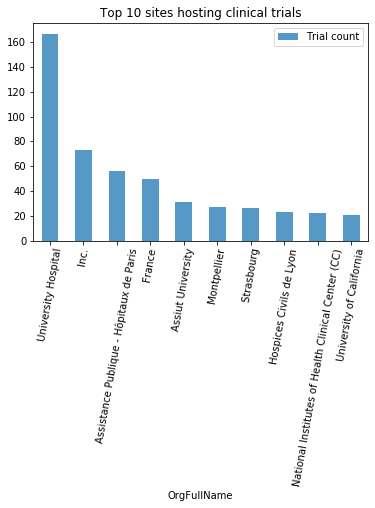

In [26]:
# Code not used in final output

# create a list of the unique organizations
unique_orgs = new_df_org["OrgFullName"].unique()
grouped_schools_df = new_df_org.groupby("OrgFullName")


# create a measure for the number of trials per org and build a dframe
trial_count_per_org = grouped_schools_df["NCTId"].count()
org_summary_df = pd.DataFrame({"Trial per org": trial_count_per_org,})

# plot the trials across treatments on a bar chart
x_axis = np.arange(len(unique_orgs))
trial_count = org_summary_df["Trial per org"]

# create data summary
df = pd.DataFrame({"Unique Orgs": unique_orgs,
                                  "Trial count": trial_count,})

# sort the data and limit to 10
dff = df.sort_values(["Trial count"], ascending=False).groupby('Unique Orgs').head(10)

try2 = dff.head(10,)

# plot the data
try2.plot(kind='bar',alpha=0.75, rot=80)

plt.title('Top 10 sites hosting clinical trials')

In [39]:


# create a list of the orgs and separte by org class
unique_orgs = location_data["OrgClass"].unique()

org_count_group = location_data.groupby("OrgClass")

# create a measure for the number of trials per org and build a dframe
trial_count_per_org = org_count_group["NCTId"].count()

# create data summary
df = pd.DataFrame({#"Unique Orgs": unique_orgs,
                    "Trial count": trial_count_per_org,})


df.head(100)

,Trial count
OrgClass,
FED,9
INDUSTRY,372
NETWORK,30
NIH,29
OTHER,2337
OTHER_GOV,144


Text(0.5, 1.0, 'Types of organizations running clinical trials')

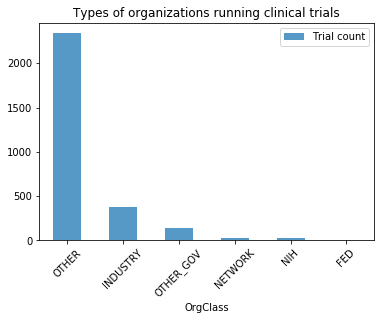

In [28]:

# create a measure for the number of studies per org and build a dframe
trial_count_per_orgc = org_count_group["NCTId"].count()
org_summary_df = pd.DataFrame({"Trial per org": trial_count_per_orgc,})

# plot the studies across classes on a bar chart
x_axis = np.arange(len(unique_orgs))
trial_count = org_summary_df["Trial per org"]

# create data summary
df = pd.DataFrame({"Unique Orgs": unique_orgs,
                                  "Trial count": trial_count,})

dff = df.sort_values(["Trial count"], ascending=False).groupby('Unique Orgs').head(10)

try2 = dff.head(10,)

try2.plot(kind='bar',alpha=0.75, rot=45)
plt.title('Types of organizations running clinical trials')

In [29]:
# Code used in final output

# separate the location status into rows based on NCTId
new_df_org = pd.DataFrame(location_data.LocationStatus.str.split(',').tolist(), index=location_data.NCTId).stack()

new_df_org = new_df_org.reset_index([0, 'NCTId'])
new_df_org.columns = ['NCTId', 'LocationStatus',]


pd.set_option('display.max_rows', new_df_org.shape[0]+1)

new_df_org

,NCTId,LocationStatus
0,NCT04395482,Recruiting'
1,NCT04395482,'Recruiting'
2,NCT04395482,'Recruiting'
3,NCT04395482,'Recruiting'
4,NCT04395482,'Recruiting'
5,NCT04395482,'Recruiting'
6,NCT04395482,'Recruiting'
7,NCT04395482,'Recruiting
8,NCT04395924,Recruiting
9,NCT04476940,


In [30]:
# find out what unique statuses exist
unique_orgs = new_df_org["LocationStatus"].unique()

print(unique_orgs)

["Recruiting'" " 'Recruiting'" " 'Recruiting" 'Recruiting' ''
 " 'Not yet recruiting" "Not yet recruiting'" " 'Not yet recruiting'"
 "Available'" " 'Available'" " 'Available" " 'Suspended'" " 'Active"
 " not recruiting'" 'Active' 'Available' ' not recruiting'
 "Enrolling by invitation'" "Completed'" " 'Withdrawn'" " 'Completed'"
 " 'Completed" " 'Withdrawn" " 'Terminated'"]


In [31]:
# standardize the data for location status

new_df_org["LocationStatus"].replace({"Recruiting'": "Recruiting", " 'Recruiting'": "Recruiting", " 'Recruiting": "Recruiting"}, inplace=True)
new_df_org["LocationStatus"].replace({" 'Not yet recruiting": "Not yet recruiting", "Not yet recruiting'": "Not yet recruiting"}, inplace=True)
new_df_org["LocationStatus"].replace({"Available'": "Available", " 'Available'": "Available", " 'Available": "Available"}, inplace=True)
new_df_org["LocationStatus"].replace({" 'Suspended'": "Suspended"}, inplace=True)
new_df_org["LocationStatus"].replace({" 'Suspended'": "Suspended"}, inplace=True)
new_df_org["LocationStatus"].replace({" 'Active": "Active"}, inplace=True)
new_df_org["LocationStatus"].replace({" not recruiting'": "Not recruiting"," not recruiting": "Not recruiting", " 'Not yet recruiting'": "Not recruiting"}, inplace=True)
new_df_org["LocationStatus"].replace({"Completed'": "Completed"," 'Completed'": "Completed"," 'Completed": "Completed" }, inplace=True)
new_df_org["LocationStatus"].replace({" 'Active": "Active"}, inplace=True)
new_df_org["LocationStatus"].replace({"Enrolling by invitation'": "Enrolling by invitation"}, inplace=True)
new_df_org["LocationStatus"].replace({" 'Withdrawn'": "Withdrawn"," 'Withdrawn": "Withdrawn", }, inplace=True)
new_df_org["LocationStatus"].replace({" 'Terminated'": "Terminated"}, inplace=True)
new_df_org["LocationStatus"].replace({"": "No status"}, inplace=True)

In [32]:
#print list to ensure data is standardized
unique_status = new_df_org["LocationStatus"].unique()

for i in unique_status:
    print(i)

Recruiting
No status
Not yet recruiting
Not recruiting
Available
Suspended
Active
Enrolling by invitation
Completed
Withdrawn
Terminated


In [33]:
# group the studies by their status
org_status_group = new_df_org.groupby("LocationStatus")

# create a measure for the number of trials per status and build a dframe
trial_status_per_org = org_status_group["NCTId"].count()

# create data summary
df = pd.DataFrame({#"Unique Orgs": unique_orgs,
                    "Trial count": trial_status_per_org,})


df.head(100)

,Trial count
LocationStatus,
Active,67
Available,315
Completed,64
Enrolling by invitation,1
No status,1415
Not recruiting,1071
Not yet recruiting,169
Recruiting,6006
Suspended,5


Text(0.5, 1.0, 'Status of clinical trial sites for COVID-19')

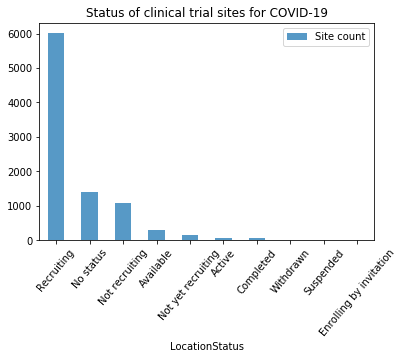

In [34]:
# create a measure for the number of trials per status and build a dframe
trial_count_per_status = org_status_group["NCTId"].count()
status_summary_df = pd.DataFrame({"Trial per status": trial_count_per_status,})

# plot the trials across status on a bar chart
x_axis = np.arange(len(unique_orgs))
site_count = status_summary_df["Trial per status"]


# create data summary
df = pd.DataFrame({"Unique Orgs": unique_status,
                                  "Site count": site_count,})

dff = df.sort_values(["Site count"], ascending=False).groupby('Unique Orgs').head(10)

try2 = dff.head(10,)

try2.plot(kind='bar',alpha=0.75, rot=50)

plt.title('Status of clinical trial sites for COVID-19')

In [35]:
# find the total number of locations
Total_Locations = df["Site count"].sum()

Total_Locations

9124

In [36]:
# Add blanks to avoid double counts
new_df_org["LocationStatus"].replace({"No Status": ""}, inplace=True)

# group the sites by their trial names and find the locations per trial
grouped_sites = new_df_org.groupby(['NCTId'])
Sites_per_study = grouped_sites["LocationStatus"].count()

# build a dataframe with Sites per studies and convert sites to number
grade_summary_df = pd.DataFrame({"Sites per Study": Sites_per_study})
grade_summary_df["Sites per Study"] = grade_summary_df.loc[:, "Sites per Study"].astype(float)


pd.set_option('display.max_rows', grade_summary_df.shape[0]+1)

print(grade_summary_df)

             Sites per Study
NCTId                       
NCT01306084              1.0
NCT02517489             32.0
NCT02656381              1.0
NCT02735707             90.0
NCT02765191              1.0
NCT02788903              1.0
NCT02875301              5.0
NCT02901041              1.0
NCT03042143              1.0
NCT03105102            505.0
NCT03175796              1.0
NCT03184662             20.0
NCT03260140              1.0
NCT03261050              3.0
NCT03276559              4.0
NCT03305341              1.0
NCT03323463              8.0
NCT03331445              1.0
NCT03348670              1.0
NCT03376854              1.0
NCT03398135            379.0
NCT03452774              1.0
NCT03620409              1.0
NCT03648372              8.0
NCT03651622              1.0
NCT03680274              1.0
NCT03681288              1.0
NCT03684980              8.0
NCT03710746              2.0
NCT03716869              1.0
NCT03724045              1.0
NCT03728257              1.0
NCT03793673   

In [37]:
# Create the bins in which Data will be held
bins = [0, 1, 2, 3, 5, 10, 25, 50, 100, 1000]

# Create the names for the bins
group_names = ["1", "2", "3", "4 or 5", "6 to 10", "11 to 25", "26 to 50", "51 to 100", "101 or more"]

# add a column of the bins to the table
pd.cut(grade_summary_df["Sites per Study"], bins, labels=group_names).head()
grade_summary_df["Site Range"] = pd.cut(grade_summary_df["Sites per Study"], bins, labels=group_names)

# Create a GroupBy object based upon range
budget_group = grade_summary_df.groupby("Site Range")

# Find how many rows fall into each bin
print(budget_group["Site Range"].count())

Site Range
1              2440
2               123
3                67
4 or 5           81
6 to 10          93
11 to 25         67
26 to 50         28
51 to 100        18
101 or more       4
Name: Site Range, dtype: int64


Text(0, 0.5, 'Number of Trials')

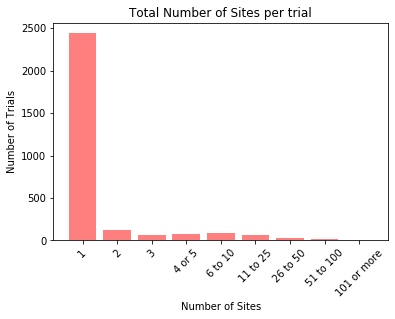

In [38]:
# create list of site numbers
sites = ["1", "2", "3", "4 or 5", "6 to 10", "11 to 25", "26 to 50", "51 to 100", "101 or more"]

# create a count of the sites per study
site_count = budget_group["Sites per Study"].count()
x_axis = np.arange(len(sites))


# plot the site ranges as x and trial count as y
plt.bar(x_axis, site_count, color='r', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(rotation=45)
plt.xticks(tick_locations, sites)

# add title and axis labels
plt.title("Total Number of Sites per trial")
plt.xlabel("Number of Sites")
plt.ylabel("Number of Trials")